In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import risktools as rt
from loader import _load_json
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
up = {"m*": {"user": "", "pass": ""}, "eia": "", "quandl": ""}

up["eia"] = os.getenv("EIA")
up["quandl"] = os.getenv("QUANDL")
up["m*"]["pass"] = os.getenv("MS_PASS")
up["m*"]["user"] = os.getenv("MS_USER")


Half-life of theta in days =  11.644872633407081


<AxesSubplot:>

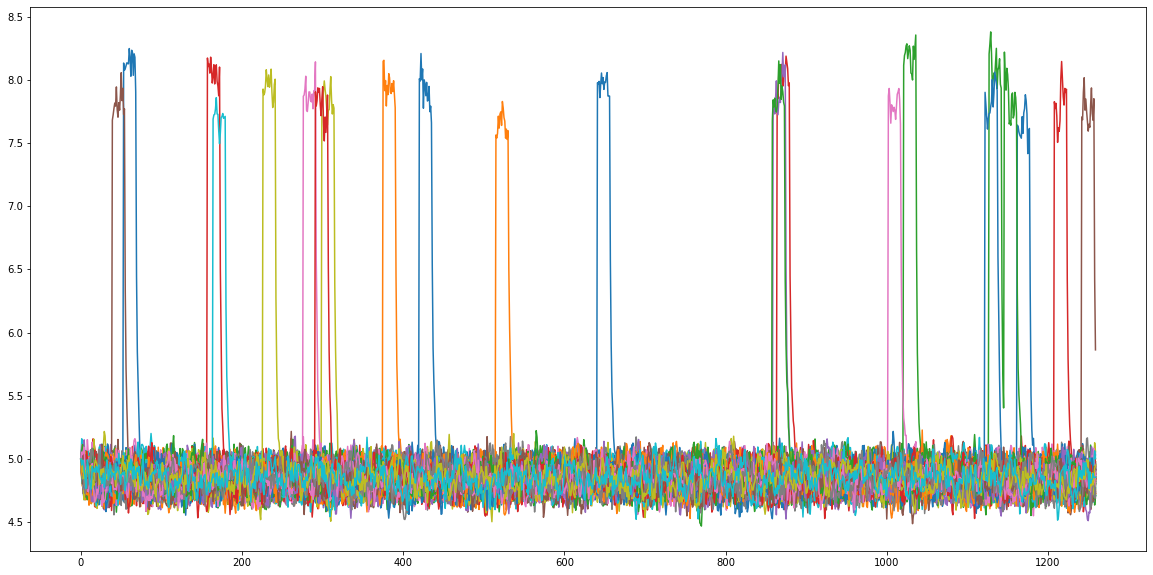

In [69]:
rt.simOUJ(theta=15,dt=1/252, mr_lag=15, T=5).iloc[:,:100].plot(legend=False, figsize=(20,10))

In [ ]:
mvgbm = rt.MVGBM(
    s0=[100,100,100], 
    r=0.0, 
    sigma=[.2,.2,.2], 
    T=0.25, 
    dt=1/252, 
    cor=[[1,0.5,0.5],[0.5,1,0.5],[0.5,0.5,1]],
    asset_names=['A','B','C']
    )
mvgbm.fit()
mvgbm.simulate()
mvgbm.plot_efficient_frontier(strike=100)

In [ ]:
i = np.random.randint(0,1000)
print(i)
prices = pd.DataFrame(mvgbm.sims[:,i,:])
prices

In [ ]:
returns = np.log(prices) - np.log(prices).shift(1)

In [ ]:
returns.dropna().std()*np.sqrt(252)

In [ ]:
mvgbm2 = rt.MVGBM(
    r=0.0, 
    T=0.25, 
    dt=1/252, 
    prices=prices
    )
mvgbm2.fit()
mvgbm2._s0=[100,100,100]
mvgbm2.simulate()
mvgbm2.plot_efficient_frontier(strike=100, portfolio_sims=10000)

In [ ]:
pd.DataFrame(mvgbm2.sims[:,:,0]).iloc[:,:100].plot(legend=False)

In [ ]:
mvgbm2._sigma

In [ ]:
mvgbm2._cor